<a href="https://colab.research.google.com/github/AlidarxD/projects/blob/main/smartphone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

URL: https://www.kaggle.com/datasets/shubham2703/smartphone-retail-outlet-sales-data

In [8]:
from urllib.request import urlretrieve
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
smart_df = pd.read_csv("/content/SMARTPHONE RETAIL OUTLET SALE DATA.csv")

In [3]:
smart_df.drop(columns=['P_NO','F.Y', 'QUARTER'],inplace = True)
smart_df['Date'] = pd.to_datetime(smart_df['Date'], format ='%d-%m-%Y')

In [4]:
smart_df['m-y'] = smart_df.Date.dt.to_period('Q').dt.strftime('%Y-%q')
smart_df['my'] = smart_df.Date.dt.strftime('%Y-%m')
task1 = smart_df.groupby("m-y")["Amount"].sum()

In [6]:
quarter_mean = smart_df.groupby(["m-y", "TYPE OF PRODUCT"])["Amount"].mean().unstack()
quarter_mean

TYPE OF PRODUCT,ACCESSORY,MOBILE,TABLET
m-y,,,
2018-2,2817.432627,24523.282698,24406.777692
2018-3,2765.030252,20844.495157,10711.013000
2018-4,4591.255437,20266.808603,24451.977500
2019-1,3502.076316,24743.221122,21137.906364
2019-2,4327.684034,20538.569072,21330.512308
2019-3,4621.475934,21205.110604,22524.190909
2019-4,5094.445152,23448.255064,22306.638333
2020-1,5108.526275,21444.372308,20806.054286
2020-2,2330.510000,23588.134286,10161.020000


Calculated the average revenue for each type of product for each quarter and built bar chart

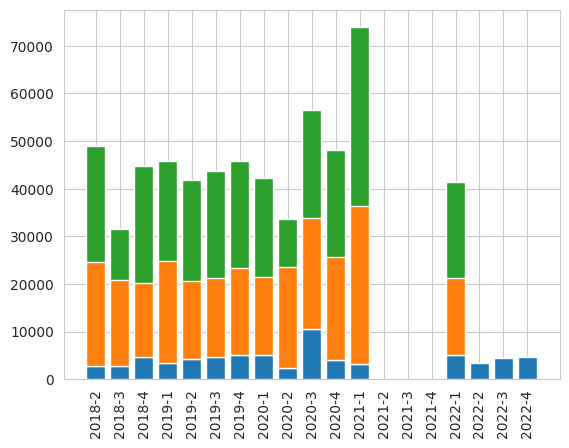

In [9]:
a = quarter_mean["ACCESSORY"]
m = quarter_mean["MOBILE"]
t = quarter_mean["TABLET"]
plt.bar(a.index, a.values)
plt.bar(m.index, m.values, bottom=a)
plt.bar(t.index, t.values, bottom=m)
plt.xticks(rotation=90)
plt.show()

heat map

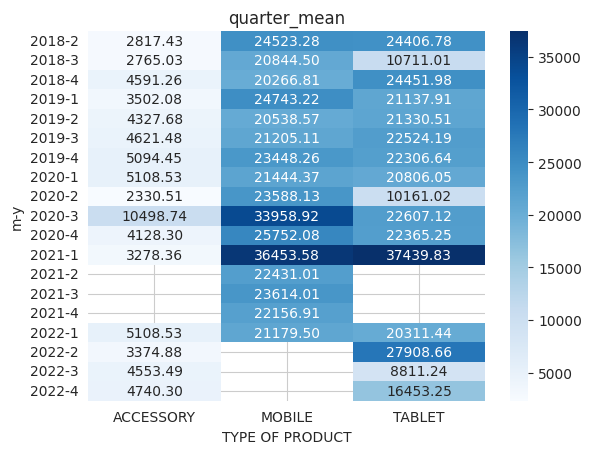

In [12]:
plt.title("quarter_mean")
sns.heatmap(quarter_mean, fmt=".2f", annot=True, cmap='Blues');

In [16]:
payment_type = smart_df.groupby("TYPE OF PRODUCT")["Quantity"].sum()
payment_type = payment_type.sort_values(ascending=False)
pop = payment_type.index[0]
mobile = smart_df[smart_df["TYPE OF PRODUCT"] == pop]
mobi_mean = mobile.groupby("PAYMENT TYPE")["Amount"].mean()
mobi_mean_df = pd.DataFrame(mobi_mean)

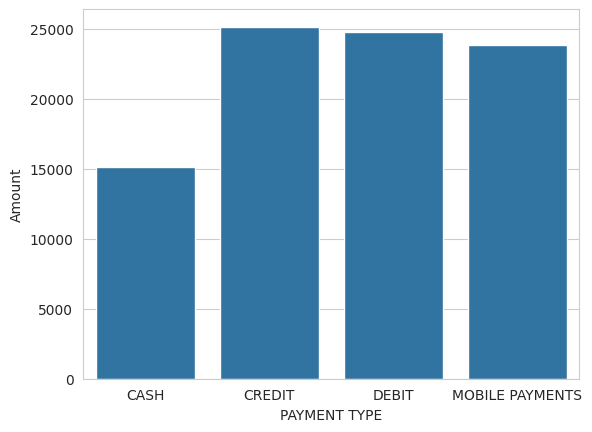

In [17]:
sns.barplot(x="PAYMENT TYPE", y="Amount",data=mobi_mean_df);

In [18]:
types = smart_df.groupby(["TYPE OF PRODUCT","TYPE OF ACCESSORY/MOBILE"])["Amount"].mean()
types_df = pd.DataFrame(types)
types_df

Amount
TYPE OF PRODUCT TYPE OF ACCESSORY/MOBILE               
ACCESSORY       BATTERY                     1139.209431
                CHARGER                     2026.600030
                COVER                       2592.410435
                DATA CABLE                   988.693333
                GALAXY WATCH               19855.509328
                POWER BANK                  1905.265357
                WIRELESS EARPHONES          8364.128358
                WIRELESS HEADSET            2131.681672
MOBILE          BUDGET PHONE                9061.436543
                FLAGSHIP PHONE             61484.260571
                LUXURY PHONE              101666.707872
                MIDRANGE PHONE             20101.134352
                PREMIUM MIDRANGE PHONE     40072.791625
TABLET          BUDGET TABLET              15208.699701
                FLAGSHIP TAB               52499.580000
                MIDRANGE TAB               20942.651639
                PREMIUM MIDRANGE TAB       40270.905556

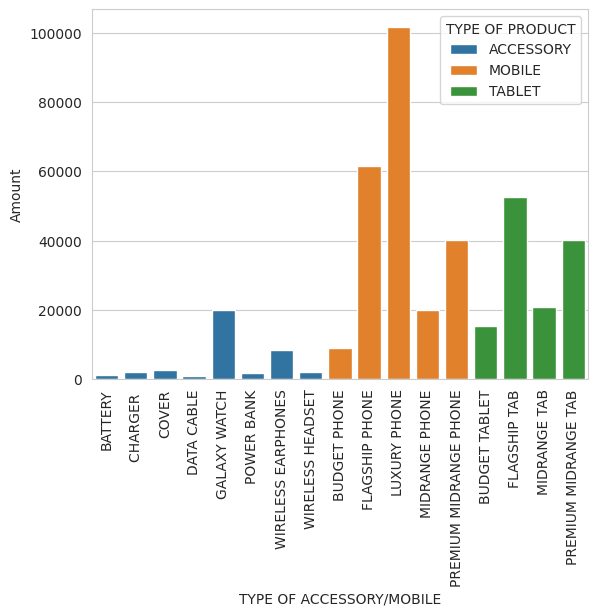

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x="TYPE OF ACCESSORY/MOBILE",y="Amount",hue="TYPE OF PRODUCT",data=types_df,)
plt.tick_params(axis='x', rotation=90)
plt.show()

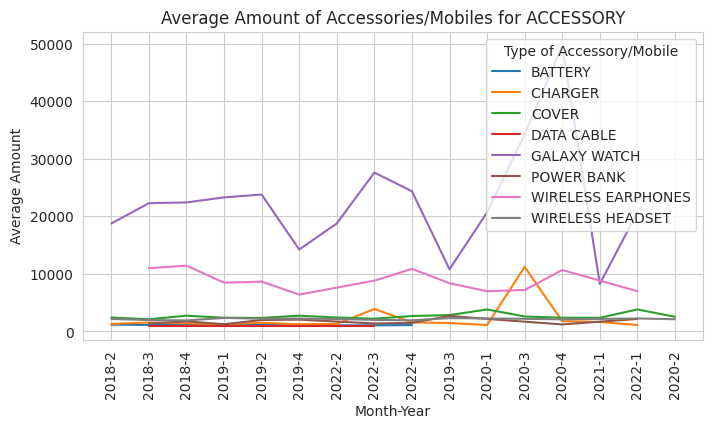

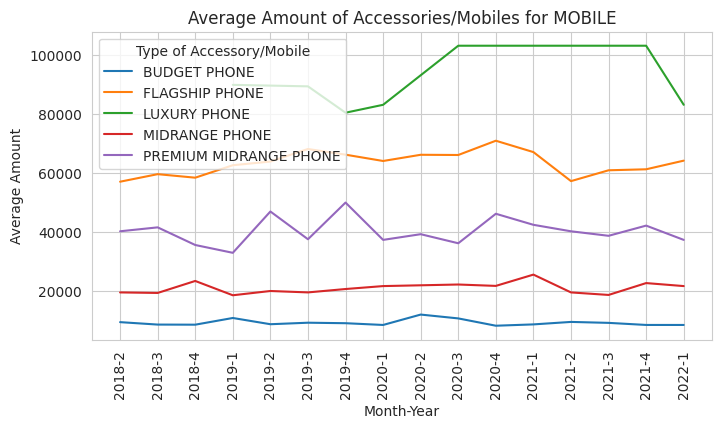

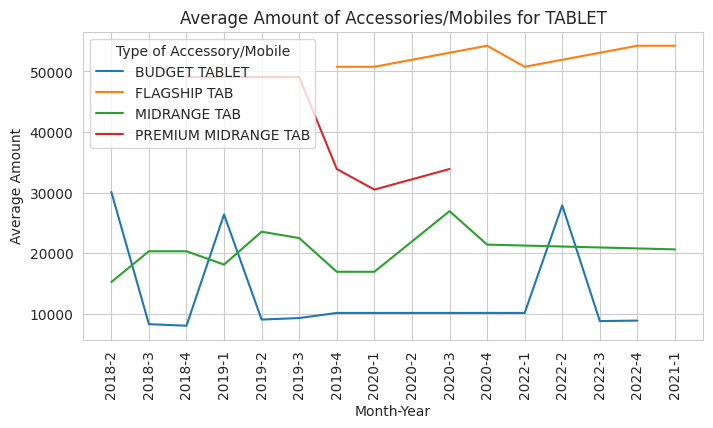

In [23]:
avg_price_type = smart_df.groupby(["TYPE OF PRODUCT", "TYPE OF ACCESSORY/MOBILE", "m-y"])["Amount"].mean().reset_index()

unique_products = avg_price_type["TYPE OF PRODUCT"].unique()

for product in unique_products:
    product_data = avg_price_type[avg_price_type["TYPE OF PRODUCT"] == product]

    plt.figure(figsize=(8, 4))
    sns.lineplot(x="m-y", y="Amount", hue="TYPE OF ACCESSORY/MOBILE", data=product_data)

    plt.title(f'Average Amount of Accessories/Mobiles for {product}')
    plt.xlabel('Month-Year')
    plt.ylabel('Average Amount')
    plt.legend(title='Type of Accessory/Mobile')
    plt.xticks(rotation=90)

    plt.show()